Feature name:  || Module: Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192

KeyboardInterrupt: 

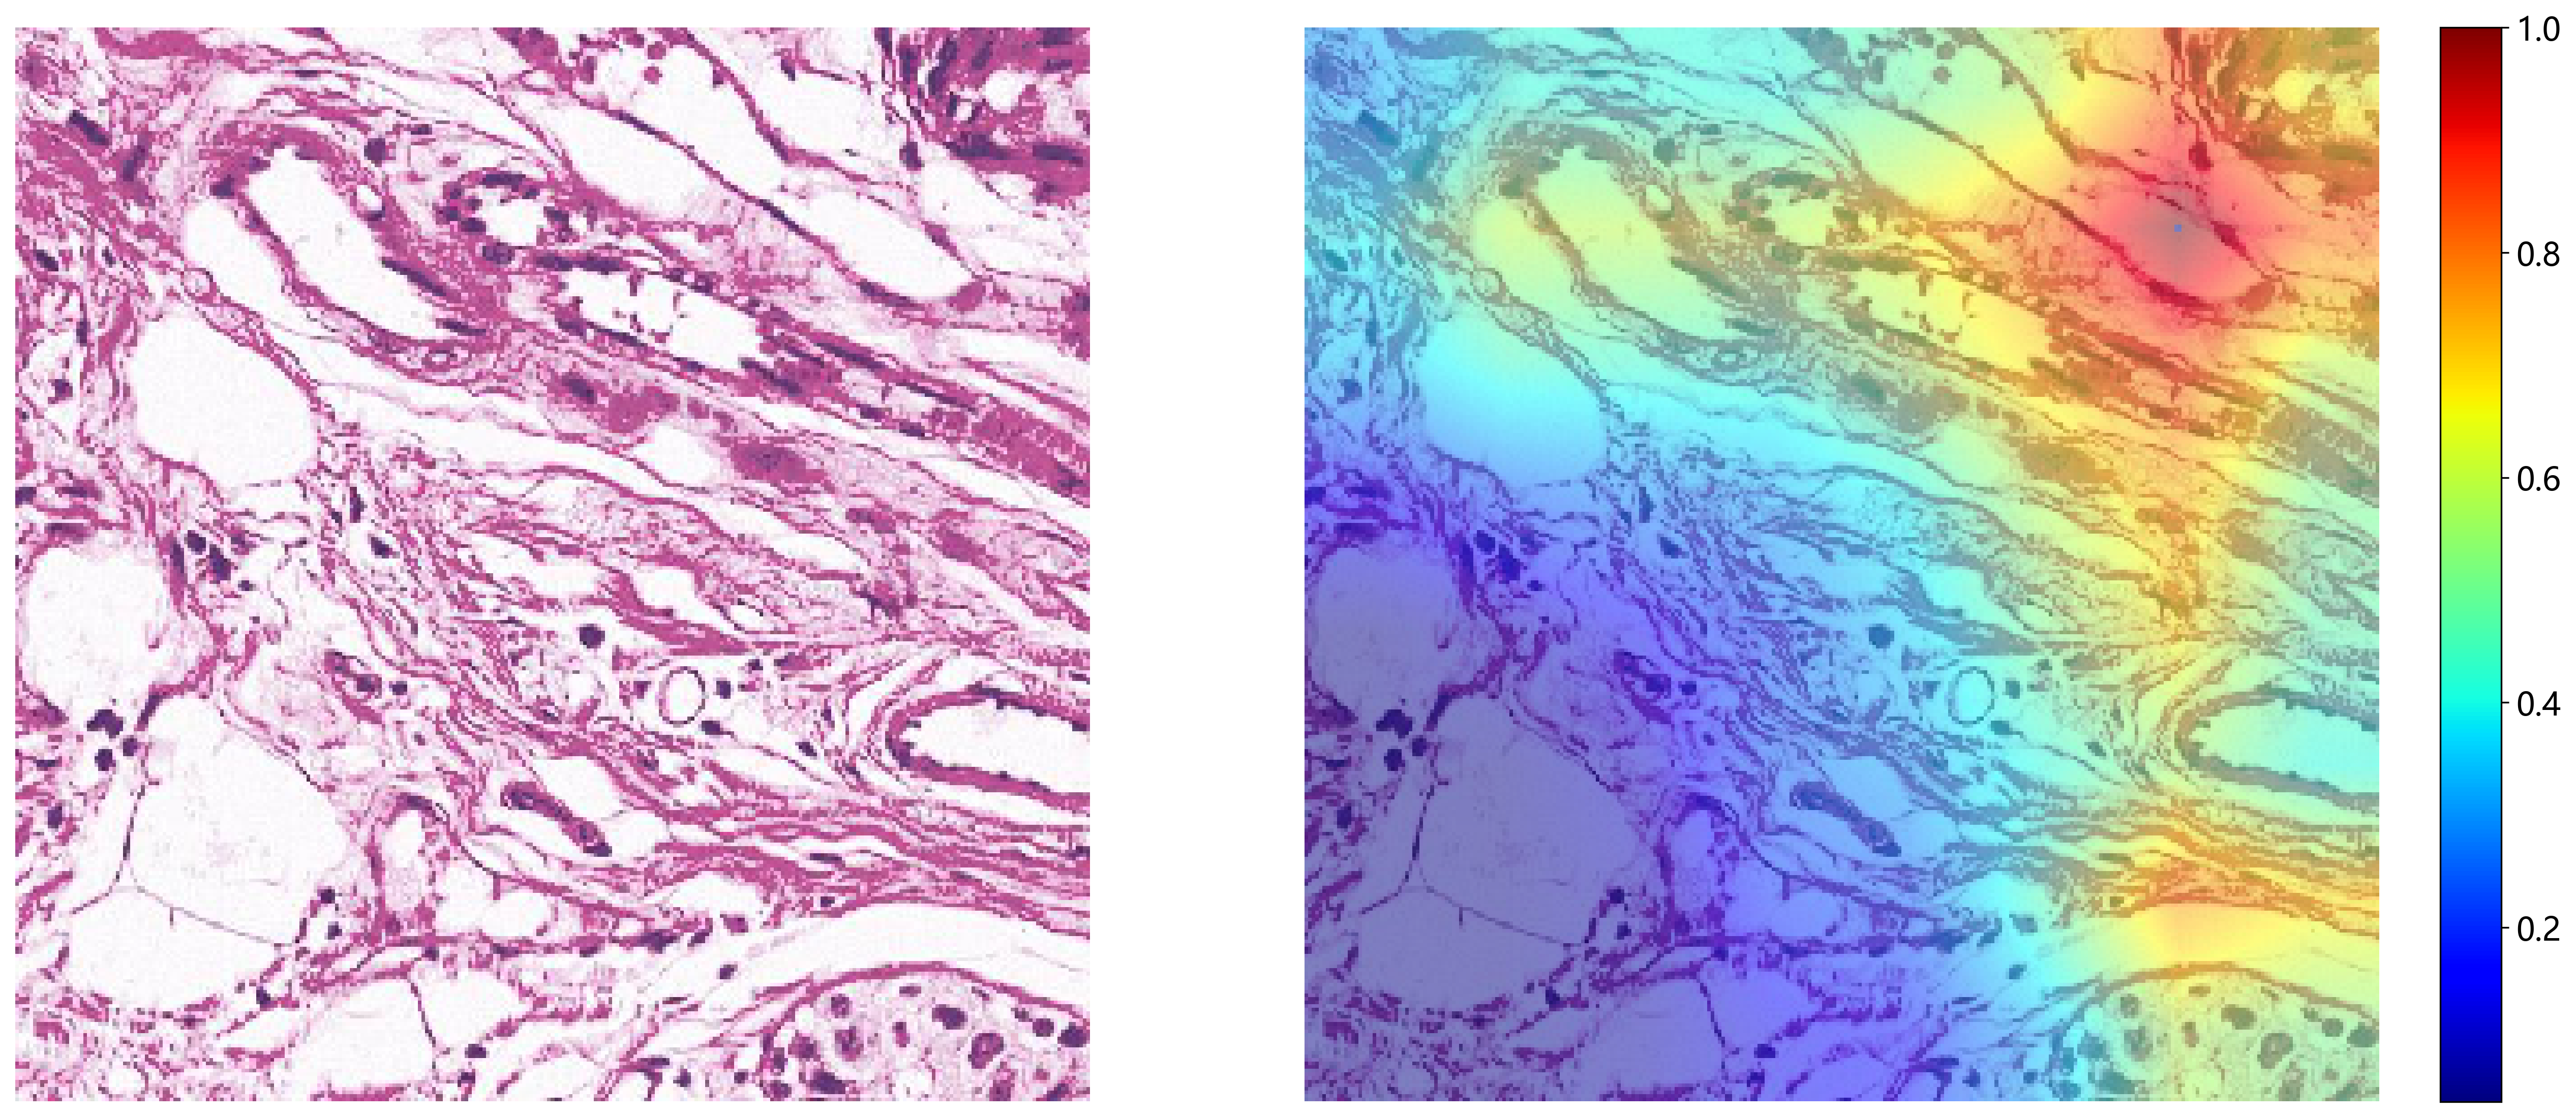

In [1]:
from onekey_algo.datasets.image_loader import default_loader
from onekey_algo.custom.components.comp2 import show_cam_on_image
import torch
import os
import random

from onekey_algo.custom.components.comp2 import extract, init_from_model, init_from_onekey
from onekey_algo.utils.MultiProcess import MultiProcess
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import monai
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

samples = glob(r'F:\20230904-LiuHui\patches_norm/*/*.jpg')
random.shuffle(samples)
def viz_sample(samples, thread_id):
    model, transformer, device = init_from_onekey(r'E:\20230904-LiuHui\Task1\models\inception_v3\viz')
    for n, m in model.named_modules():
        print('Feature name:', n, "|| Module:", m)
    target_layer = "Mixed_7c.branch_pool.conv"
    gradcam = monai.visualize.GradCAM(nn_module=model, target_layers=target_layer)

    random.shuffle(samples)
    viz_dir = r'E:\20230904-LiuHui\Task1\models\inception_v3\Grad-CAM'
    os.makedirs(viz_dir, exist_ok=True)
    for sample in samples:
        img = default_loader(sample)
        sample_ = transformer(img)
        sample_  = sample_.view(1, *sample_.size()).to(device)
        res_cam = gradcam(x=sample_, class_idx=None)
        fig, axes = plt.subplots(1, 2, figsize=(20, 10), facecolor='white')
    #     axes[0].imshow(-res_cam[0][0].cpu(), cmap='jet')
        axes[0].imshow(img.resize(sample_.size()[2:]))
        axes[0].axis('off')
    #     plt.savefig(f"viz/{os.path.basename(sample).replace('.png', '_se.png')}", bbox_inches = 'tight')
    #     plt.show()
    #     plt.figure(figsize=(10, 10))
    #     plt.axis('off')
        imshow = axes[1].imshow(show_cam_on_image(img.resize(sample_.size()[2:]), -res_cam[0][0].cpu(), use_rgb=True, reverse=False), 
                                cmap='jet')
        axes[1].axis('off')
        cax = fig.add_axes([0.92, 0.15, 0.02, axes[1].get_position().height]) 
        plt.colorbar(imshow, cax=cax)
        plt.savefig(f'{viz_dir}/{os.path.basename(sample)}', bbox_inches = 'tight')
        plt.close()
viz_sample(samples, thread_id=1)
# MultiProcess(func=viz_sample, samples=samples, num_process=1).run()